[View in Colaboratory](https://colab.research.google.com/github/amit6604/TensofFlow-programs/blob/master/Logistic_Regression.ipynb)

In [0]:
# Importing Libraries

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
sns.set(style='whitegrid')

# Reading the IRIS Dataset

In [0]:
from sklearn.datasets import load_iris
data = load_iris()

iris = pd.DataFrame(data.data, columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
iris["Species"] = data.target

In [0]:
# Species 'Iris-setosa' as 0
# Species 'Iris-versicolor' as 1

iris  = iris[:101]

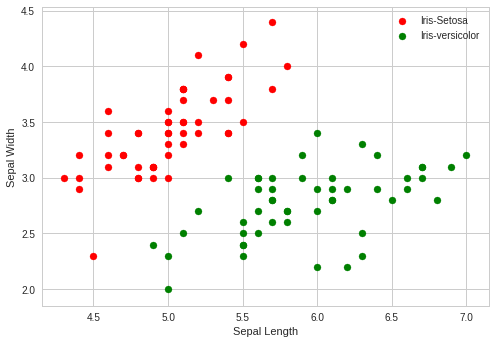

In [4]:
plt.scatter(iris[:50].SepalLengthCm, iris[:50].SepalWidthCm, label="Iris-Setosa", color="r")
plt.scatter(iris[50:100].SepalLengthCm, iris[50:100].SepalWidthCm, label="Iris-versicolor", color="g")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(loc = "best")

In [0]:
# Drop labels 
X = iris.drop(labels=["Species"], axis=1).values
y = iris.Species.values

# Splitting the dataset
* 80 % for training Set
* 20 % for testing Set

In [0]:
# set seed for numpy and tensorflow
# set for reproducible results

seed = 6
np.random.seed(seed)
tf.set_random_seed(seed)

In [0]:
# set replace = False, Avoid double Sampling
train_index = np.random.choice(len(X), round(len(X) * .80), replace=False)

In [0]:
test_index = np.array(list(set(range(len(X))) - set(train_index)))
train_X = X[train_index]
train_y = y[train_index]
test_X = X[test_index]
test_y = y[test_index]

In [0]:
def min_max_normalized(data):
  col_max = np.max(data, axis=0)
  col_min = np.min(data, axis=0)
  return np.divide(data - col_min, col_max - col_min)

# Normalizing Dateset

In [0]:
train_X = min_max_normalized(train_X)
test_X = min_max_normalized(test_X)

# Building the model Framework

In [0]:
# Begin building the model Framework
# Decalare the variables that need to be learned and initialization
# There are 4 features here.

W = tf.Variable(tf.random_normal(shape=[4, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [0]:
# Define the Placeholders

X = tf.placeholder(dtype=tf.float32, shape=[None, 4])
y = tf.placeholder(dtype=tf.float32, shape=[None, 1])

# Declare the model to learn

pred = tf.matmul(X, W) + b

# Declare the loss function
# Using Sigmoid cross-entropy loss function

loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = pred, labels= y))

In [0]:
# Defining the learning rate and batch size

learning_rate = 0.003
batch_size = 32
epochs = 2000

# Defining the optimizer

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)


In [0]:
# Define the accuracy
# The default threshold is 0.5, rounded off directly

prediction = tf.round(tf.sigmoid(pred))

accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y), dtype=tf.float32))

In [18]:
# Model training

loss_trace = []
train_acc = []
test_acc = []

for epoch in range(epochs):
  batch_index = np.random.choice(len(train_X), size=batch_size)
  batch_train_X = train_X[batch_index]
  batch_train_y = np.matrix(train_y[batch_index]).T
  sess.run(optimizer, feed_dict={X: batch_train_X, y: batch_train_y})
  training_loss = sess.run(loss, feed_dict={X: batch_train_X, y: batch_train_y})
  training_acc = sess.run(accuracy, feed_dict={X: train_X, y: np.matrix(train_y).T})
  testing_acc = sess.run(accuracy, feed_dict={X: test_X, y: np.matrix(test_y).T})
  loss_trace.append(training_loss)
  train_acc.append(training_acc)
  test_acc.append(testing_acc)
  
  if epoch% 100 ==0:
    print('Epoch: {:4d} loss: {:5f} training_acc: {:5f} testing_acc: {:5f}'. format(epoch, training_loss, training_acc, testing_acc))
  
 
  

Epoch:    0 loss: 0.690923 training_acc: 0.518519 testing_acc: 0.400000
Epoch:  100 loss: 0.692004 training_acc: 0.518519 testing_acc: 0.400000
Epoch:  200 loss: 0.684322 training_acc: 0.518519 testing_acc: 0.400000
Epoch:  300 loss: 0.641782 training_acc: 0.518519 testing_acc: 0.450000
Epoch:  400 loss: 0.702124 training_acc: 0.543210 testing_acc: 0.450000
Epoch:  500 loss: 0.660675 training_acc: 0.604938 testing_acc: 0.450000
Epoch:  600 loss: 0.631616 training_acc: 0.691358 testing_acc: 0.650000
Epoch:  700 loss: 0.634663 training_acc: 0.839506 testing_acc: 0.700000
Epoch:  800 loss: 0.602137 training_acc: 0.888889 testing_acc: 0.800000
Epoch:  900 loss: 0.600136 training_acc: 0.913580 testing_acc: 0.850000
Epoch: 1000 loss: 0.578382 training_acc: 0.950617 testing_acc: 0.850000
Epoch: 1100 loss: 0.564973 training_acc: 0.975309 testing_acc: 1.000000
Epoch: 1200 loss: 0.564534 training_acc: 0.987654 testing_acc: 1.000000
Epoch: 1300 loss: 0.538561 training_acc: 0.975309 testing_acc: 1

# Visualization Cross Entropy Loss

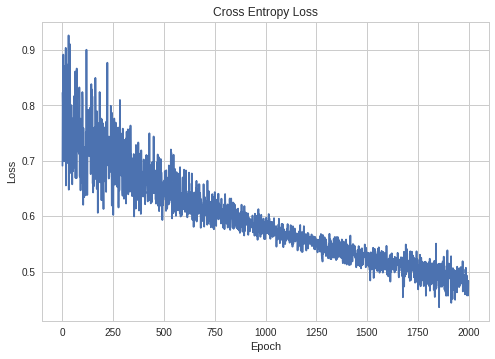

In [19]:
plt.plot(loss_trace)
plt.title("Cross Entropy Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Visualization Accuracy

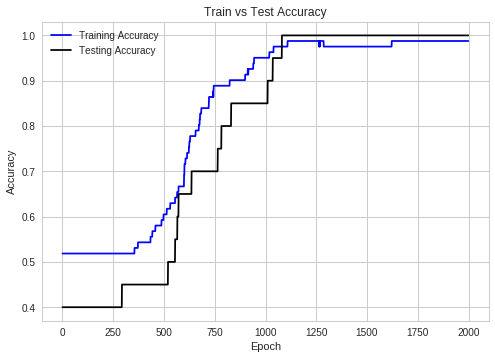

In [20]:
plt.plot(train_acc, 'b-', label="Training Accuracy")
plt.plot(test_acc, 'k-', label="Testing Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy")
plt.legend(loc="best")
plt.show()